In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.4.0
OS Darwin 16.7.0 x86_64 i386 64bit
pandas 0.23.0
matplotlib 2.2.2
seaborn 0.9.0
Wed Dec 26 11:22:11 2018 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'DOGE'

In [5]:
def doge_block_supply_curve(max_size=None):
    out = [
        # Block num,
        # Total supply,
    ]
    
    y = 0
    max_blocks = 52560000    # Breakpoint 100 years from now
    
    # Mex size to prevent memory overflows
    if max_size is not None:
        block_freq = int(max_blocks / _max_size)
    else:
        block_freq = 1
        
    for block in tqdm_notebook(range(max_blocks)):
        if block < 100000:
            block_reward = 500000
        elif block < 200000:
            block_reward = 250000
        elif block < 300000:
            block_reward = 125000
        elif block < 400000:
            block_reward = 62500
        elif block < 500000:
            block_reward = 31250
        elif block < 600000:
            block_reward = 15625
        else:
            block_reward = 10000

        y += block_reward
        if block % block_freq == 0:
            out.append([block, y])

    return out, block_freq

In [6]:
start_date = datetime.date(2013, 12, 6)
block_time = datetime.timedelta(seconds=60)

_max_size = 10000
block_supply, _block_freq = doge_block_supply_curve(_max_size)

supply = cmb.datetime_supply_curve(
    start_date=start_date,
    block_time=block_time*_block_freq,
    block_supply=block_supply,
)

,block,total_supply,total_supply_pct,date
0,0,500000,0.000081,2013-12-06 00:00:00
1,5256,2628500000,0.425334,2013-12-09 15:36:00
2,10512,5256500000,0.850587,2013-12-13 07:12:00
3,15768,7884500000,1.275840,2013-12-16 22:48:00
4,21024,10512500000,1.701093,2013-12-20 14:24:00


,block,total_supply,total_supply_pct,date
9995,52533720,617774710000,99.965980,2113-10-24 18:00:00
9996,52538976,617827270000,99.974485,2113-10-28 09:36:00
9997,52544232,617879830000,99.982990,2113-11-01 01:12:00
9998,52549488,617932390000,99.991495,2113-11-04 16:48:00
9999,52554744,617984950000,100.000000,2113-11-08 08:24:00


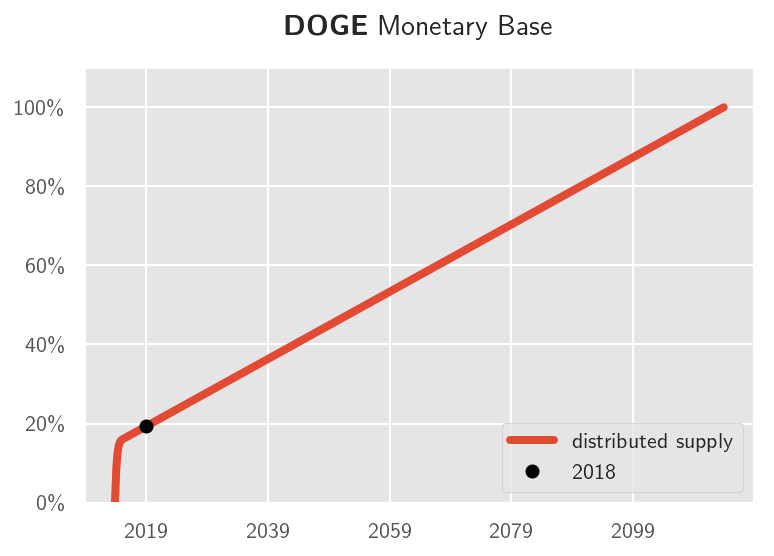

In [7]:
display(supply.head())
display(supply.tail())

cmb.plot_supply_curve(
    supply,
    'DOGE',
    out_name='DOGE',
    ylim=(0, 110),
);

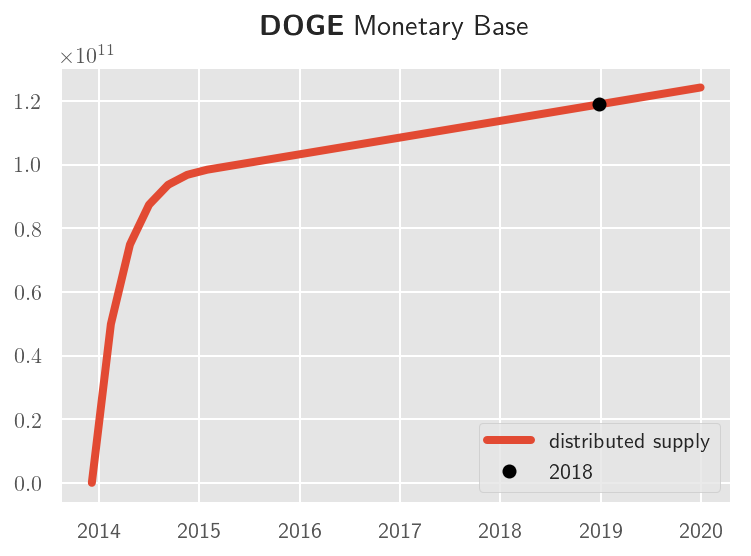

In [8]:
mask = supply.date < datetime.datetime(2020, 1, 1)

cmb.plot_supply_curve(
    supply[mask],
    'DOGE',
    plot_pct=False,
    out_name='DOGE_zoom'
);

## Standardize Time Series

In [9]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 5215 lines to file ../output-data/DOGE_weekly.csv


,coin,block,total_supply,total_supply_pct,date
0,DOGE,0,500000,0.000081,2013-12-01
1,DOGE,5256,2628500000,0.425334,2013-12-01
2,DOGE,15768,7884500000,1.275840,2013-12-01
3,DOGE,26280,13140500000,2.126346,2013-12-01
4,DOGE,36792,18396500000,2.976852,2013-12-01


,coin,block,total_supply,total_supply_pct,date
5210,DOGE,52512696,617564470000,99.93196,2113-10-01
5211,DOGE,52523208,617669590000,99.94897,2113-10-01
5212,DOGE,52533720,617774710000,99.96598,2113-10-01
5213,DOGE,52544232,617879830000,99.98299,2113-11-01
5214,DOGE,52554744,617984950000,100.00000,2113-11-01


In [10]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 1200 lines to file ../output-data/DOGE_monthly.csv


,coin,block,total_supply,total_supply_pct,date
0,DOGE,0,500000,0.000081,2013-12-01
1,DOGE,42048,21024500000,3.402106,2014-01-01
2,DOGE,84096,42048500000,6.804130,2014-02-01
3,DOGE,126144,56536250000,9.148483,2014-03-01
4,DOGE,168192,67048250000,10.849496,2014-04-01


,coin,block,total_supply,total_supply_pct,date
1195,DOGE,52370784,616145350000,99.702323,2113-07-01
1196,DOGE,52412832,616565830000,99.770363,2113-08-01
1197,DOGE,52460136,617038870000,99.846909,2113-09-01
1198,DOGE,52502184,617459350000,99.914949,2113-10-01
1199,DOGE,52544232,617879830000,99.982990,2113-11-01


In [11]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 101 lines to file ../output-data/DOGE_yearly.csv


,coin,block,total_supply,total_supply_pct,date
0,DOGE,0,500000,0.000081,2013-12-01
1,DOGE,42048,21024500000,3.402106,2014-01-01
2,DOGE,567648,97932015625,15.846990,2015-01-01
3,DOGE,1093248,103369990000,16.726943,2016-01-01
4,DOGE,1618848,108625990000,17.577449,2017-01-01


,coin,block,total_supply,total_supply_pct,date
96,DOGE,50005584,592493350000,95.875045,2109-01-01
97,DOGE,50531184,597749350000,96.725551,2110-01-01
98,DOGE,51056784,603005350000,97.576057,2111-01-01
99,DOGE,51582384,608261350000,98.426564,2112-01-01
100,DOGE,52107984,613517350000,99.277070,2113-01-01
